In [36]:
# Initialization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns

hyper_parameter = 0.0001

In [37]:
df = pd.read_csv("sample.csv")

df.columns = ["feature", "target"]

In [38]:
df.head()

,feature,target
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


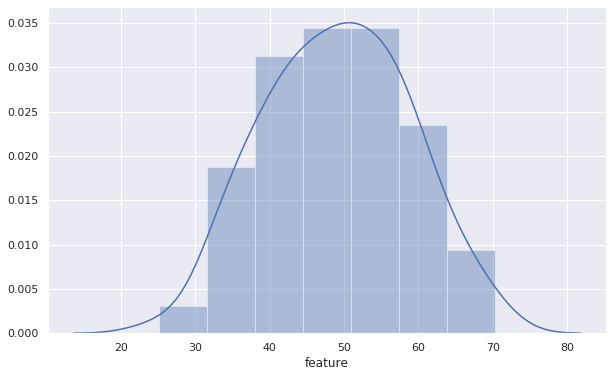

In [58]:
sns.set(rc={'figure.figsize':(10, 6)})
ax = sns.distplot(df["feature"])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df["feature"], df["target"], test_size=0.33, random_state=42)

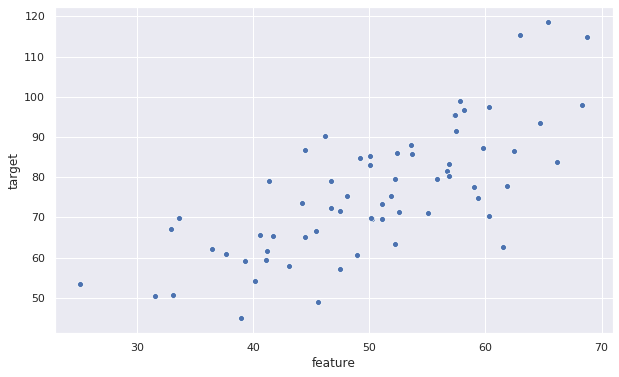

In [57]:
sns.set(rc={'figure.figsize':(10, 6)})
ax = sns.scatterplot(X_train, y_train)

using following formulas to calculate 

Slope and constant for the line:

For m:

- m = m - alpha * (-2/n) * sum(x * (ypred - yobs))
- c = c - alpha * (-2/n) * sum(ypred - yobs)

In [42]:
from functools import reduce

def getRegressionLine(x_train, y_train, alpha, iterations):
    n = x_train.shape[0]
    m = 0
    c = 0
    for i in range(0, iterations):
        y = m*x_train + c
        loss = y_train - y
        m = m - alpha * (-2/n) * sum(x_train * (loss))
        c = c - alpha * (-2/n) * sum(loss)
    return (m, c)

In [43]:
m,c = getRegressionLine(X_train, y_train, hyper_parameter, 1000)

In [44]:
print(f"Equation is: Y = {m}*X + {c}")

Equation is: Y = 1.49855182810033*X + 0.13172949355694083


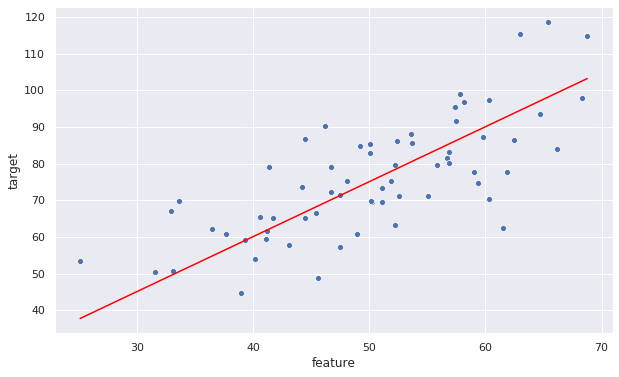

In [55]:
results = m*X_train+c

sns.set(rc={'figure.figsize':(10, 6)})

sns.scatterplot(X_train, y_train)

ax = sns.lineplot([min(X_train), max(X_train)], [min(results), max(results)], color='red')

## TESTING

In [46]:
predictions = m*X_test + c

In [47]:
predictions

62     75.262353
40     65.046421
95     73.920070
18     58.300742
97     72.286789
84     81.476612
64     59.411295
42     65.874116
10     81.580471
0      80.194564
31     63.724990
76     55.473363
47     50.879011
26     95.462945
44     49.087985
4      82.765157
22     62.434985
12     87.300198
88     57.084923
73    105.548970
49     57.256261
70     80.545418
68     53.597202
15     67.097809
39     66.900618
33     86.305125
9      68.195549
81     51.581696
11     66.313847
65     84.246026
94     75.104539
30     53.431966
28     75.893655
Name: feature, dtype: float64

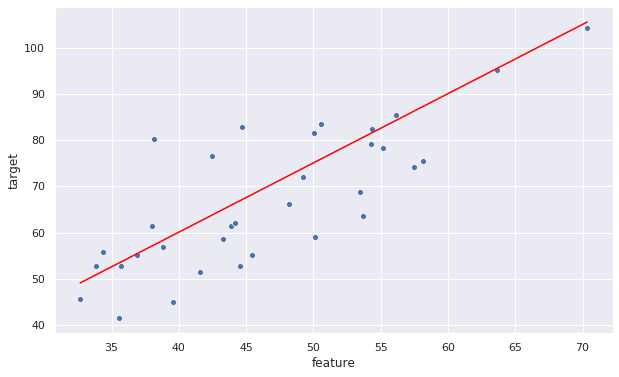

In [66]:
sns.set(rc={'figure.figsize':(10, 6)})

sns.scatterplot(X_test, y_test)
ax = sns.lineplot([min(X_test), max(X_test)], [min(predictions), max(predictions)], color='red')

## ACCURACY

In [60]:
from sklearn.metrics import r2_score

print(r2_score(y_test, predictions))

0.5856675370553317


In [61]:
from sklearn.metrics import r2_score

print(r2_score(y_train, results))

0.5171498709438377
